In [1]:
print("test")

test


In [2]:
import gdown
import zipfile
import os

file_id = '1ENSzYg3oMLSTqqzeB3pnD0GtGTLYdn1E'
download_url = f'https://drive.google.com/uc?id={file_id}'

# Output zip filename
output_zip = 'dataset.zip'

# Download from Google Drive
gdown.download(download_url, output_zip, quiet=False)

# Unzip the file
extract_path = './data'  # You can change this path as needed
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(output_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Extracted to: {extract_path}")


Downloading...
From: https://drive.google.com/uc?id=1ENSzYg3oMLSTqqzeB3pnD0GtGTLYdn1E
To: c:\Users\josiw\Documents\unibertsitatea\3.o\2.o cuatri\DeepLearning\anomaly-detection\dataset.zip
100%|██████████| 1.95M/1.95M [00:00<00:00, 11.6MB/s]


Extracted to: ./data


In [1]:
import pandas as pd

### EDA Process


In [2]:
df = pd.read_csv("./data/BTCUSDT_1h.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38461 entries, 0 to 38460
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   open              38461 non-null  float64
 1   high              38461 non-null  float64
 2   low               38461 non-null  float64
 3   close             38461 non-null  float64
 4   volume            38461 non-null  float64
 5   close_time        38461 non-null  object 
 6   quote             38461 non-null  float64
 7   takers_buy_base   38461 non-null  float64
 8   takers_buy_quote  38461 non-null  float64
dtypes: float64(8), object(1)
memory usage: 2.6+ MB


In [6]:
df.describe()

,open,high,low,close,volume,quote,takers_buy_base,takers_buy_quote
count,38461.000000,38461.000000,38461.000000,38461.000000,38461.000000,3.846100e+04,38461.000000,3.846100e+04
mean,17589.002805,17696.560219,17473.314191,17589.962025,2101.814189,4.369855e+07,1046.701701,2.159233e+07
std,17359.685254,17463.372583,17249.006318,17359.989729,2175.337360,7.080532e+07,1066.267302,3.481741e+07
min,2870.900000,2950.000000,2817.000000,2919.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,6726.000000,6752.760000,6695.490000,6726.110000,919.149470,7.125238e+06,470.170524,3.665090e+06
50%,9298.330000,9339.370000,9259.980000,9298.750000,1536.182670,1.545427e+07,773.216614,7.739254e+06
75%,19024.330000,19125.760000,18900.000000,19026.490000,2571.497519,5.187811e+07,1279.230445,2.529690e+07
max,68635.120000,69000.000000,68451.190000,68633.690000,47255.762685,1.514465e+09,20628.794047,6.849674e+08


In [7]:
df.head()

,open,high,low,close,volume,close_time,quote,takers_buy_base,takers_buy_quote
0,4261.48,4313.62,4261.32,4308.83,47.181009,2017-08-16 23:59:59.999000-05:00,202366.138393,35.160503,150952.477943
1,4308.83,4328.69,4291.37,4315.32,23.234916,2017-08-17 00:59:59.999000-05:00,100304.823567,21.448071,92608.279728
2,4330.29,4345.45,4309.37,4324.35,7.229691,2017-08-17 01:59:59.999000-05:00,31282.312670,4.802861,20795.317224
3,4316.62,4349.99,4287.41,4349.99,4.443249,2017-08-17 02:59:59.999000-05:00,19241.058300,2.602292,11291.347015
4,4333.32,4377.85,4333.32,4360.69,0.972807,2017-08-17 03:59:59.999000-05:00,4239.503586,0.814655,3552.746817


In [8]:
df.shape

(38461, 9)

In [3]:
df["close_time"].min(), df["close_time"].max()


('2017-08-16 23:59:59.999000-05:00', '2022-01-10 17:59:59.999000-05:00')

In [4]:
# Removing the localization in 'close_time'
df['close_time'] = pd.to_datetime(df['close_time'], errors='coerce')
df['close_time'] = df['close_time'].dt.tz_localize(None)
df

,open,high,low,close,volume,close_time,quote,takers_buy_base,takers_buy_quote
0,4261.48,4313.62,4261.32,4308.83,47.181009,2017-08-16 23:59:59.999,2.023661e+05,35.160503,1.509525e+05
1,4308.83,4328.69,4291.37,4315.32,23.234916,2017-08-17 00:59:59.999,1.003048e+05,21.448071,9.260828e+04
2,4330.29,4345.45,4309.37,4324.35,7.229691,2017-08-17 01:59:59.999,3.128231e+04,4.802861,2.079532e+04
3,4316.62,4349.99,4287.41,4349.99,4.443249,2017-08-17 02:59:59.999,1.924106e+04,2.602292,1.129135e+04
4,4333.32,4377.85,4333.32,4360.69,0.972807,2017-08-17 03:59:59.999,4.239504e+03,0.814655,3.552747e+03
...,...,...,...,...,...,...,...,...,...
38456,41184.44,41723.87,41118.36,41604.58,1816.054560,2022-01-10 13:59:59.999,7.523858e+07,968.387390,4.012530e+07
38457,41604.58,41698.07,41205.65,41297.15,1358.541170,2022-01-10 14:59:59.999,5.637205e+07,690.382540,2.864461e+07
38458,41297.15,41779.46,41158.99,41714.72,1245.440490,2022-01-10 15:59:59.999,5.161796e+07,642.619620,2.663620e+07
38459,41716.81,41985.00,41562.38,41714.13,1365.382650,2022-01-10 16:59:59.999,5.703537e+07,724.557670,3.026707e+07


# 1. Pre-Processing

conversion to datetime

In [5]:
df['close_time'] = pd.to_datetime(df['close_time'])

make sure its sorted by date

In [6]:
df = df.sort_values('close_time').reset_index(drop=True)


hadle of missing/duplicate data

In [7]:
# Drop duplicates (if any)
df = df.drop_duplicates()

# Check for missing values
missing = df.isnull().sum()
print(missing)

# Optionally, fill or drop missing values
df = df.dropna()


open                0
high                0
low                 0
close               0
volume              0
close_time          2
quote               0
takers_buy_base     0
takers_buy_quote    0
dtype: int64


Feature Selection

In [8]:
features = ['open', 'high', 'low', 'close', 'volume', 'quote', 'takers_buy_base', 'takers_buy_quote']
data = df[features]


Feature Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

import numpy as np
scaled_data = np.array(scaled_data)


Temporal Sequences

In [10]:
def create_sequences(data, seq_length=24):
    X = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
    return np.array(X)

sequence_length = 24  # You can adjust this
X_sequences = create_sequences(scaled_data, sequence_length)


In [11]:
df_plot = df.rename(columns={
    'close_time': 'Date',
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'volume': 'Volume'
})

df_plot.set_index('Date', inplace=True)

# Filter to essential columns
df_plot = df_plot[['Open', 'High', 'Low', 'Close', 'Volume']]

In [12]:
import mplfinance as fplt

C:\Users\josiw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


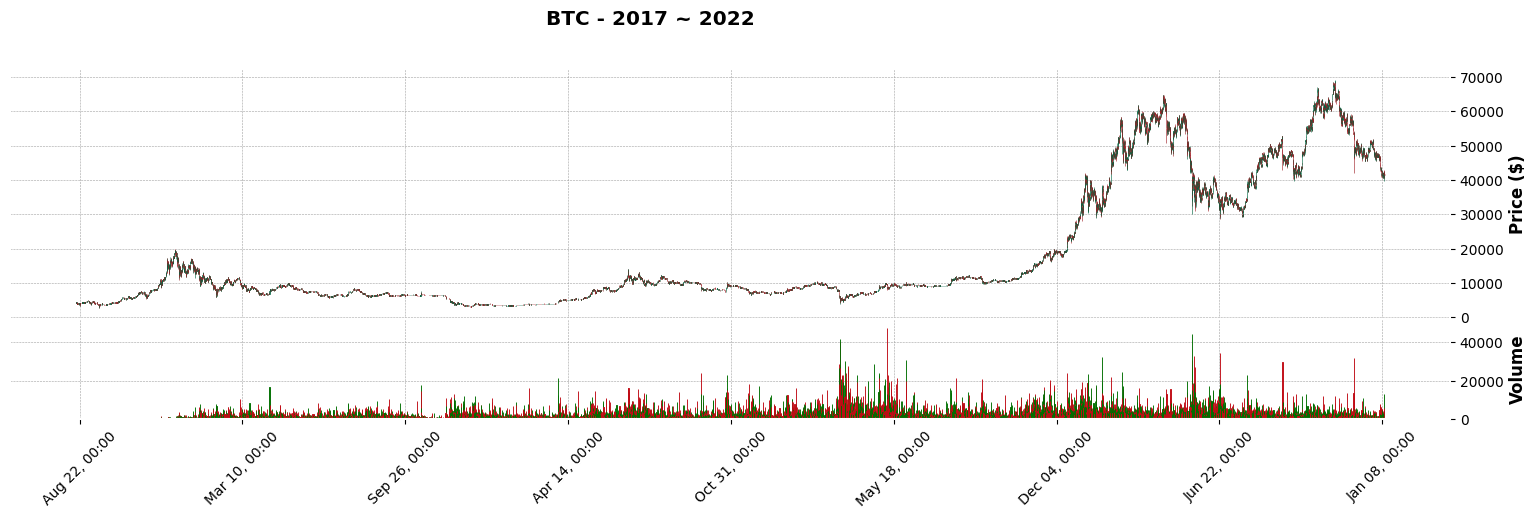

In [19]:
# Use either %matplotlib widget or %matplotlib inline in Jupyter
# %matplotlib widget
%matplotlib inline

# Plot
fplt.plot(
    df_plot,
    type='candle',
    style='charles',
    figsize=(20, 5),
    title='BTC - 2017 ~ 2022',
    ylabel='Price ($)',
    volume=True,
    ylabel_lower='Volume',
    show_nontrading=True
)
